In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('C:/Users/abdal/Desktop/Winter 2022/BMEN 415/Project/Regression/Regression_QSAR_Bioconcentration.csv')

##TRAINING: INDEX 0 to 584
##TESTING: INDEX 585 to 778
df = pd.DataFrame(data)

x = df.iloc[:,3:12]
y = df.iloc[:,13]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=5)
print(x.head())
print(y.head())
x_train.shape

   nHM  piPC09   PCD  X2Av  MLOGP  ON1V  N-072  B02[C-N]  F04[C-O]
0    0     0.0  1.49  0.14   1.35  0.72      0         1         5
1    0     0.0  1.47  0.14   1.70  0.88      0         1         5
2    0     0.0  1.20  0.25   4.14  2.06      0         0         0
3    0     0.0  1.69  0.13   1.89  0.79      0         1         8
4    0     0.0  0.52  0.25   2.65  1.31      0         0         0
0    0.74
1    0.93
2    3.24
3   -0.40
4    2.24
Name: logBCF, dtype: float64


(623, 9)

Mean Square Error: 0.5328610433038373
Root Mean Square Error: 0.7299733168437305
R^2: 0.7465514210616206


C:\Users\abdal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Random Forest Model')

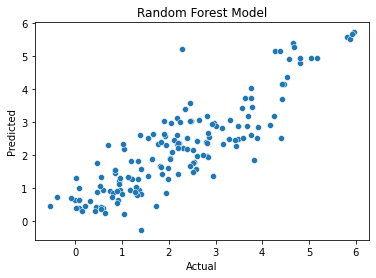

In [3]:
###Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

rfr = RandomForestRegressor(random_state=5) ##Creating a model object of type Random forest regressor
rfr.fit(x_train,y_train)    #Training the model

y_predict_test = rfr.predict(x_test)   #Predicted Values

mse = mean_squared_error(y_test,y_predict_test,squared=True) #Returns MSE
rmse = mean_squared_error(y_test,y_predict_test,squared=False) #Returns RMSE
r2 = r2_score(y_test,y_predict_test)  ## Returns R2 value


print('Mean Square Error:',mse)
print('Root Mean Square Error:',rmse)
print('R^2:',r2)

sns.scatterplot(y_test,y_predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Random Forest Model")

Mean Square Error: 0.5597965892610399
Root Mean Square Error: 0.7481955554940433
R^2: 0.7337398711621288


C:\Users\abdal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bagged Forest Model')

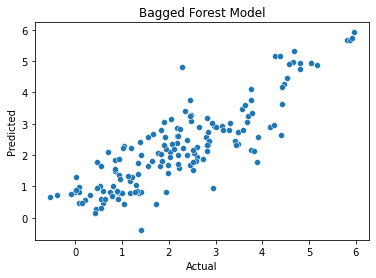

In [4]:
### Bagged Forest
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

bfr = BaggingRegressor(random_state=5)
bfr.fit(x_train,y_train)

y_predict_test = bfr.predict(x_test)

mse = mean_squared_error(y_test,y_predict_test,squared=True) #Returns MSE
rmse = mean_squared_error(y_test,y_predict_test,squared=False) #Returns RMSE
r2 = r2_score(y_test,y_predict_test)  ## Returns R2 value
#acc = accuracy_score(y_test,y_predict_test)   #Accuracy for classification

print('Mean Square Error:',mse)
print('Root Mean Square Error:',rmse)
print('R^2:',r2)

sns.scatterplot(y_test,y_predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Bagged Forest Model")

Mean Square Error: 0.47992557031304656
Root Mean Square Error: 0.6927666059453549
R^2: 0.7717295056177041


C:\Users\abdal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Support Vector Regression Model')

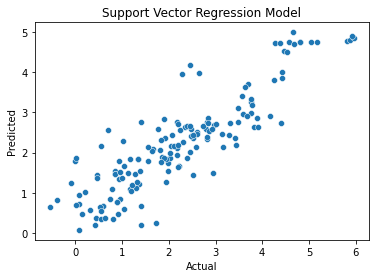

In [5]:
###Support Vector Regression

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

svr = SVR()
svr.fit(x_train,y_train)

y_predict_test = svr.predict(x_test)

mse = mean_squared_error(y_test,y_predict_test,squared=True) #Returns MSE
rmse = mean_squared_error(y_test,y_predict_test,squared=False) #Returns RMSE
r2 = r2_score(y_test,y_predict_test)  ## Returns R2 value
#acc = accuracy_score(y_test,y_predict_test)   #Accuracy for classification

print('Mean Square Error:',mse)
print('Root Mean Square Error:',rmse)
print('R^2:',r2)

sns.scatterplot(y_test,y_predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Support Vector Regression Model")